In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\ecommerce.csv",encoding="latin1")

In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df["InvoiceDate"]=pd.to_datetime(df.InvoiceDate)

In [5]:
df["Sales"]=df.UnitPrice*df.Quantity

In [76]:
df["Date"]=df.InvoiceDate.dt.date
df["Year"]=df.InvoiceDate.dt.year
df["Month"]=df.InvoiceDate.dt.month_name()
df["Monthnum"]=df.InvoiceDate.dt.month
df["Hour"]=df.InvoiceDate.dt.hour
df["Day"]=df.InvoiceDate.dt.day_name()

In [120]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,Year,Month,Monthnum,Hour,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,December,12,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,December,12,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,December,12,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,December,12,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,December,12,8,Wednesday


# Plot sales by date

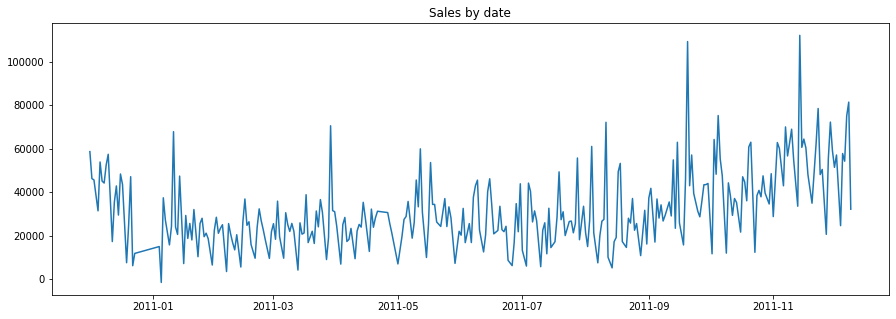

In [7]:
grouped=df.groupby("Date")["Sales"].sum().reset_index().sort_values("Date")
plt.figure(figsize=(15,5))
plt.plot(grouped.Date,grouped.Sales)
plt.title("Sales by date")
plt.show()

# Plot sales by Year and Month

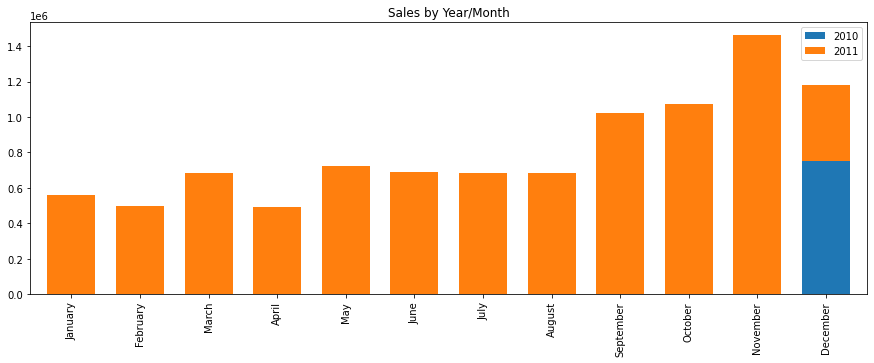

In [8]:
grouped=df.groupby(["Year","Month","Monthnum"])["Sales"].sum().reset_index().sort_values(["Year","Monthnum"])
grouped["Year"]=grouped.Year.astype(str)
pivoted=grouped.pivot(["Monthnum","Month"],"Year","Sales").reset_index()
pivoted.plot(figsize=(15,5),kind="bar",x="Month",y=pivoted.columns[2:],xlabel="",width=0.7,stacked=True)
plt.title("Sales by Year/Month")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Plot graphs that shows how sales was increasing month by month

In [9]:
grouped["PrevMonthSales"]=grouped.Sales.shift(1)
grouped["AvgMonthlySales"]=grouped.Sales.mean()
grouped["Increase"]=(100*(grouped.Sales-grouped.PrevMonthSales)/grouped.PrevMonthSales).round(1)
grouped["VSAvg"]=(grouped.AvgMonthlySales/grouped.Sales*100-100).round(1)

posx and posy should be finite values
posx and posy should be finite values


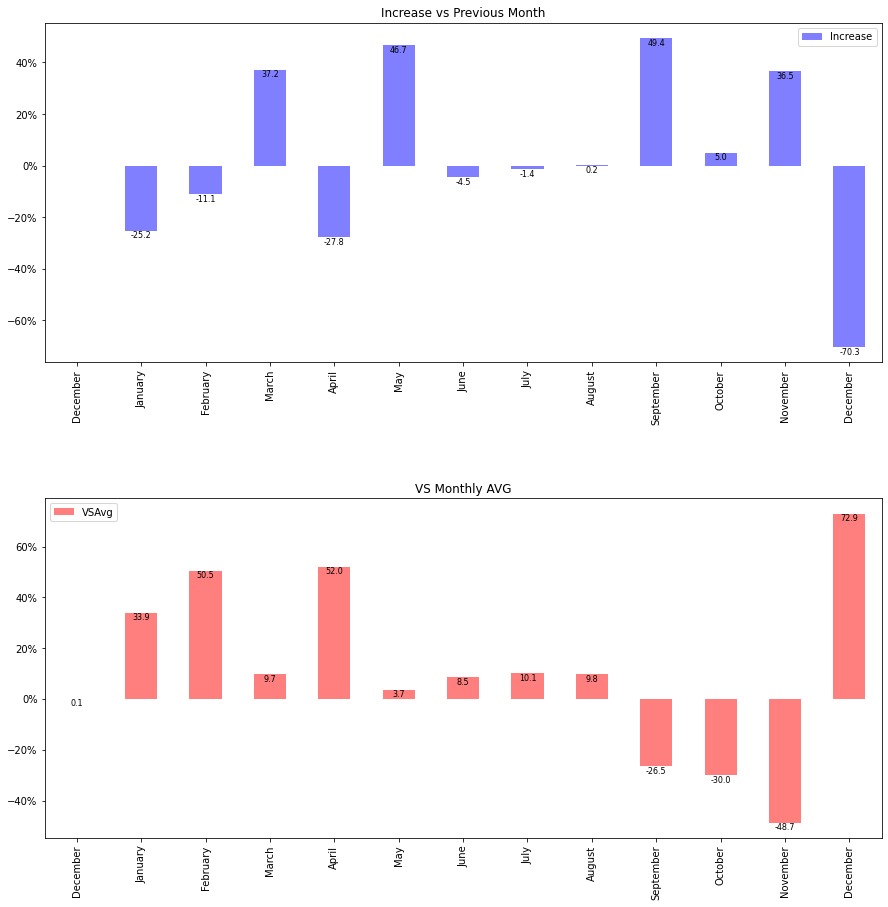

In [10]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,15))
grouped.plot(kind="bar",x="Month",y="Increase",xlabel="",ax=ax1,title=("Increase vs Previous Month"),color="b",alpha=.5)
grouped.plot(kind="bar",x="Month",y="VSAvg",xlabel="",ax=ax2,title=("VS Monthly AVG"),color="r",alpha=.5)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(100))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.subplots_adjust(hspace=0.4)

def value_labels(y):
    for i in range(len(y)):
        ax1.text(i,y.iloc[i],y.iloc[i],size=8,ha="center",va='top')
value_labels(grouped.Increase)

def value_labels(y):
    for i in range(len(y)):
        ax2.text(i,y.iloc[i],y.iloc[i],size=8,ha="center",va='top')
value_labels(grouped.VSAvg)

plt.show()

# Plot sales by hour for yeach month

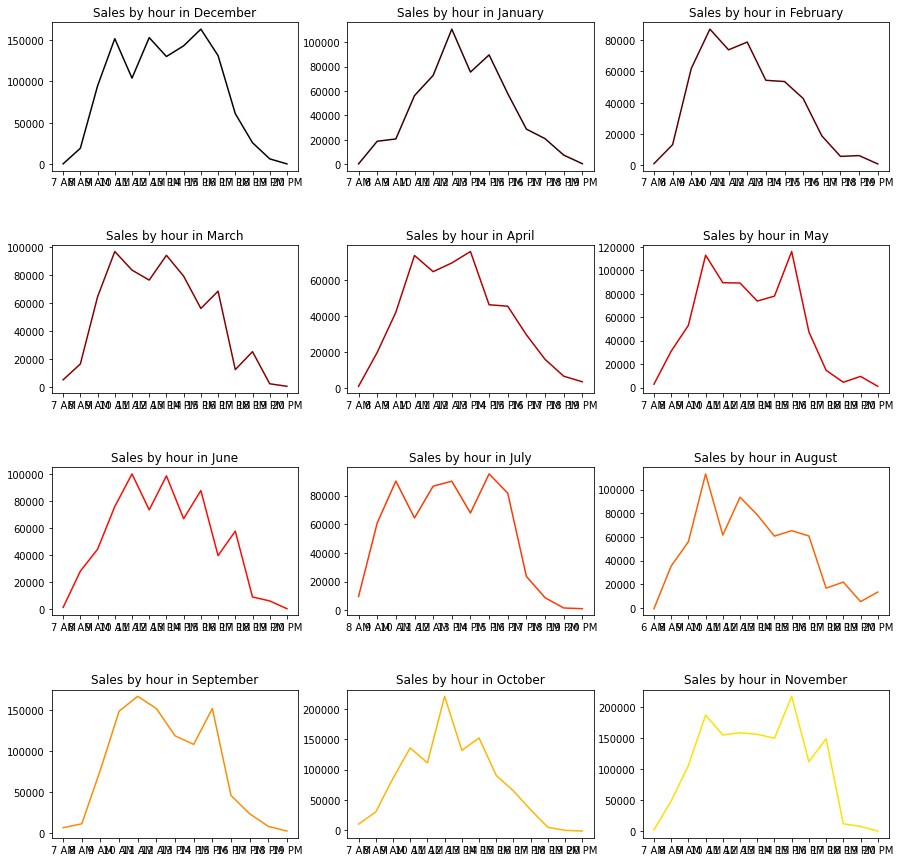

In [11]:
months=df.Month.unique()
fig,axes=plt.subplots(4,3,figsize=(15,15))
cmap=plt.get_cmap("hot")
colors=list(cmap(np.linspace(0,0.7,12)))
for ax,month,c in zip(axes.ravel(),months,colors):
    grouped=df[df.Month==month].groupby("Hour")["Sales"].sum().reset_index().sort_values("Hour")
    grouped["Hour"]=[str(i)+" AM" if int(i)<=12 else str(i)+" PM" for i in grouped.Hour]
    ax.plot(grouped.Hour,grouped.Sales,color=c)
    ax.set_title("Sales by hour in "+month)
    plt.subplots_adjust(hspace=0.5)
plt.show()

# Countries that generate to the most sales

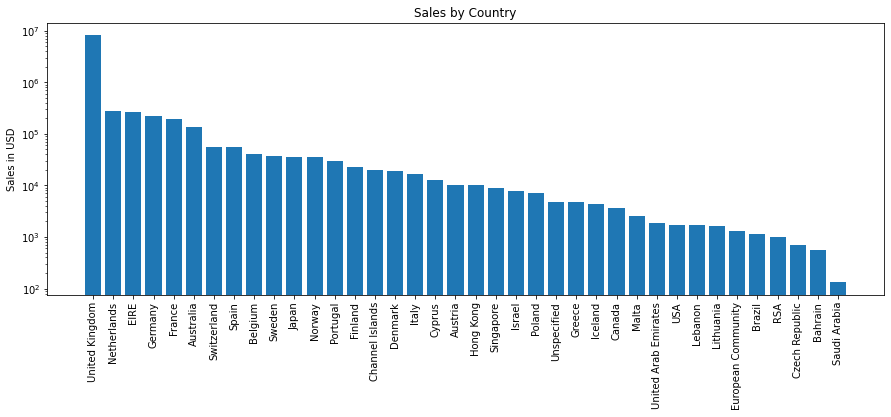

In [23]:
grouped=df.groupby("Country")["Sales"].sum().reset_index().sort_values("Sales",ascending=False)
plt.figure(figsize=(15,5))
plt.bar(grouped.Country,grouped.Sales)
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Sales by Country")
plt.ylabel("Sales in USD")
plt.show()

# Which are the most sold products

In [34]:
df.groupby("Description")["Sales"].sum().reset_index().sort_values("Sales",ascending=False).head(10)

,Description,Sales
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


# Find 10 invoices with the highest values

In [68]:
grouped=df.groupby("InvoiceNo")["Sales"].sum().reset_index().sort_values("Sales",ascending=False)
grouped.head(5)

,InvoiceNo,Sales
22025,581483,168469.60
2303,541431,77183.60
18776,574941,52940.94
19468,576365,50653.91
9741,556444,38970.00


In [81]:
df[df.InvoiceNo.isin(["581483"])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,Year,Month,Monthnum,Hour,Day
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,2011-12-09,2011,December,12,9,Friday


# At what time during the day are the most of the invoices made? 

C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


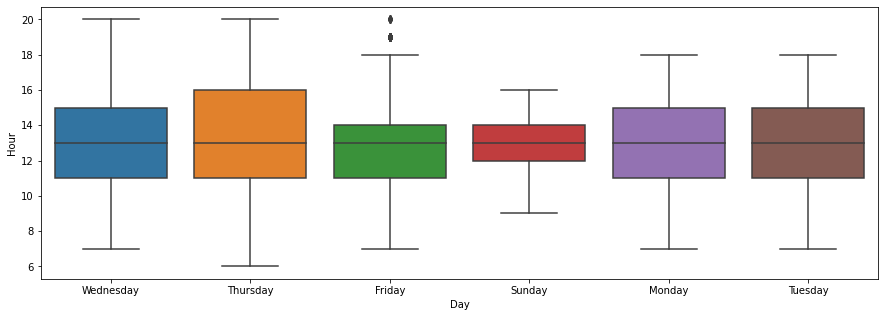

In [84]:
plt.figure(figsize=(15,5))
sns.boxplot(df.Day,df.Hour)
plt.show()

In [87]:
# On Sunday 50% of invoices are made between 12:00 and 14:00
# No invoices are made on Saturday

# Find distribution of Quantity and UnitPrice if Quantity<=10 and Price<=10

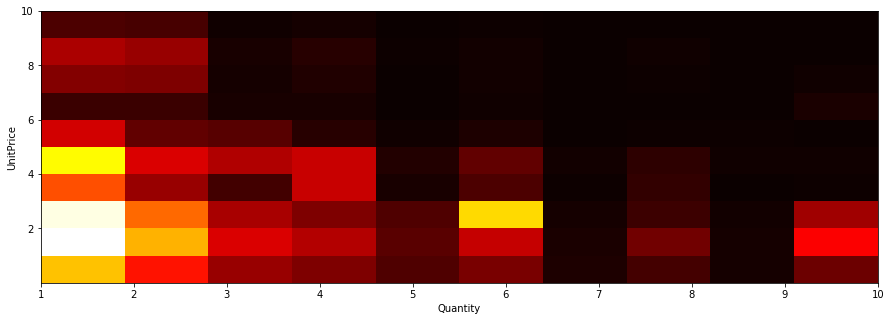

In [109]:
ndf=df[(df.Quantity<=10)&(df.UnitPrice<=10)&(df.Quantity>0)&(df.UnitPrice>0)]
plt.figure(figsize=(15,5))
plt.hist2d(ndf.Quantity,ndf.UnitPrice,cmap="hot")
plt.ylabel("UnitPrice")
plt.xlabel("Quantity")
plt.show()